Project: INVESTIGATE THE DATA SET 'No-show appointments'

Table of Contents:

Introduction

Data Wrangling

Exploratory Data Analysis

Conclusions

INTRODUCTION

DATA SET DESCRITPION

The data set chosen for analysis:
NO-SHOW APPOINTMENTS

The data set collects informations from 100k medical appointments in Brazil.
It provides information about whether or not patients show up for their appointment together with a number of characteristics about the patient included in each row.

The data set columns' names are as follows :
PatientId (provides an ID of a patient), 
AppointmentID (provides an ID of the patient's appointment),
Gender (provides information about the patient's gender), 
ScheduledDay(tells us on what day the patient set up their appointment), 
AppointmentDay (tells us the day of the patient's appointment),
Age (tells us the age of the patient),
Neighbourhood( indicates the location of the hospital), 
Scholarship(indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família), 
Columns: Hipertension, Diabetes, Alcoholism, Handcap provide information about wheter or not the patient suffers from hypertension, diabetes, alcoholism or any handicap).  
SMS_received (provides information about wheter or not a patient received an appointment confirmation sms),
No-show (tells us wheter or not patient showed up for their appointment. If patients didn't show up, the column value is 'Yes')

AIM OF THE ANALYSIS

The analysis is focused on recognising factors which might help to predict how likely the patient will show up for their scheduled appointment. The hipothetical use of the result of the analysis might be the rebuilding of appointments booking system in order to save doctors' time and hospitals' money.


QUESTIONS FOR ANALYSIS

1.Is appointment attendance dependent on patients' age? 
  If yes, in which age group this dependency is the strongest? 

2.Is there a link between message received / not received and not showing up for the appointment?
  If yes, in which age group this dependency is the strongest

3.Is there a difference in appointments' attendace for different neighbourhoods. 
  Which neighbourhood has the highest number of ‘no-show-ups’? 

4.Does the day o the week of the appointment make a difference in appointments' attendance?

5.Does illness or handicap  influence the amount of not attended appointments?



In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



DATA WRANGLING

In [2]:
#upload csv file to pandas dataframe
df = pd.read_csv('noshowappointments-may-2016.csv')



Gathering metadata to understand this particular dataset





In [3]:
#confirm number of rows in df
df.shape[0]

110527

In [4]:
#count the total number of appoinments 
df['AppointmentID'].count()

110527

In [5]:
#check number of duplicates in df
df.duplicated().sum()

0

In [6]:
# check for null values
df.isnull().values.any()

False

In [7]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775120e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We will need to rename the No-show column to avoid possible complications in the code used for further analysis

In [10]:
#change No-show column name 
df.rename(columns = {'No-show' : 'Noshow'}, inplace=True)
#check for succesful change of the column name
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


EXPLORATORY DATA ANALYSIS

QUESTION 1
Is appointment attendance dependent on patients' age? 
If yes, in which age group this dependency is the strongest? 

We need to check if there is a dependency between unattendance and patient age.
First, we will assign patients into four age related groups and we will create a new columnn 'age_groups'.
Next step - we analyse the distribution of appointments in each age group and visualise it using pie plot. 
Finally, we will check the amount of no-show appointment in each age group.

In [11]:
# View the min, 25%, 50%, 75%, max Age column values for establishing age groups' marking points.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



The maximum age is 115 - we will not correct it as it is possible (in real world, we would consult it with the data provider)
There is below 0 value as a minimum value in 'Age' column. It is impossible - so incorrect. We need to check how many below zero values we have in this column.


In [12]:
#check for values below 0 in Age column
df[df.Age<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


As it is only one record, in this case we will ignore it (using drop)

In [13]:
#correct Age column values where values are lower than 0)
df.drop(df[df['Age']<0].index, inplace=True)

In [14]:
#check again for values below 0 in Age column in corrected dataframe
df[df.Age<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow


In [15]:
#count the number of no-show and show-up appointments in Noshow column
df['Noshow'].value_counts()

No     88207
Yes    22319
Name: Noshow, dtype: int64

In [16]:
#count a percentage that no-shows make of total number of appoinments
df['Noshow'].value_counts(normalize=True)['Yes']

0.20193438647919945

In [17]:
#count a percentage that show-ups make of total numebr of appointments
df['Noshow'].value_counts(normalize=True)['No']

0.7980656135208005

In [18]:
# Prepare for creating the new column 'age_groups':
# Based on the information we have from df.describe() we can prepare bin edges that will 
# be used to "cut" the data into age groups. 
bin_edges=[0, 18.0, 37.0, 55.0, 115.0]

In [19]:
# Labels for the four age groups
bin_names=['under 19', '19-37', '38-55', '56 and over']

In [20]:
# Create age_groups column
df['age_groups'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

In [21]:
# Check for successful creation of this column
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,age_groups
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,56 and over
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,56 and over
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,56 and over
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,under 19
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,56 and over


In [22]:
#count the amount of appoinments in each patients' age group
df_age = df.groupby(['age_groups']).count()['AppointmentID']


In [23]:
print(df_age)

age_groups
under 19       25327
19-37          27250
38-55          26906
56 and over    27504
Name: AppointmentID, dtype: int64


<AxesSubplot:ylabel='AppointmentID'>

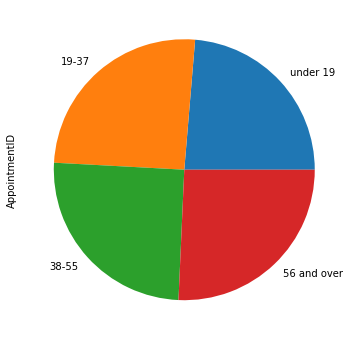

In [24]:
#numbers seem balanced. Pie chart should visualise it well.
df_age.plot(kind='pie', figsize= (6,6))

Lets confirm the balance with the more detailed bar chart:

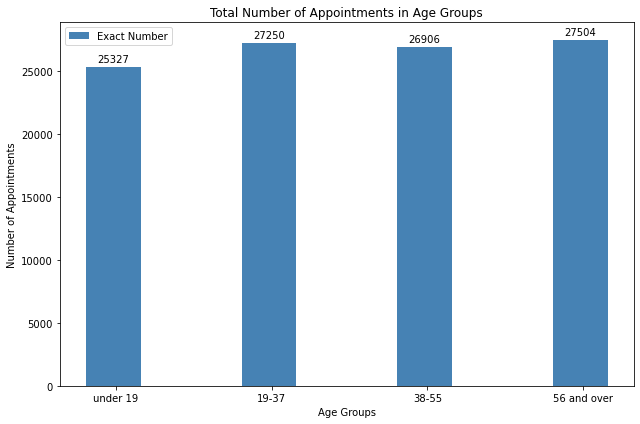

In [25]:
labels = ['under 19', '19-37', '38-55', '56 and over']
heights = [25327, 27250, 26906, 27504]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(9,6))
rects1 = ax.bar(x - width/20, heights, width, label='Exact Number', color='steelblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Age Groups')
ax.set_ylabel('Number of Appointments')

ax.set_title('Total Number of Appointments in Age Groups')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects1):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects1:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.show()

We can see from the bar chart above that the amount of appointments booked in each age group is above 25000 and is relatively similar (with the slightly lower amount of appoinments in the youngest patients group).

Now we will check if there is a dependency between patients' age and the appointments' attendance.

In [26]:
#remind for number of no-show appointments only
df['Noshow'].value_counts()['Yes']

22319

In [27]:
#counts the total number of appoinments in each patients' age group
df_age_appointments = df.groupby(['age_groups']).count()['Noshow']
print(df_age_appointments)

age_groups
under 19       25327
19-37          27250
38-55          26906
56 and over    27504
Name: Noshow, dtype: int64


In [28]:
#counts the amount of no-show appoinments in each patients' age group
df_age_noshow = df[df.Noshow=='Yes'].groupby(['age_groups']).count()['Noshow']
print(df_age_noshow)

age_groups
under 19       5708
19-37          6414
38-55          5255
56 and over    4303
Name: Noshow, dtype: int64


In [29]:
#counts the amount of show up appoinments in each patients' age group
df_age_show = df[df.Noshow=='No'].groupby(['age_groups']).count()['Noshow']
print(df_age_show)

age_groups
under 19       19619
19-37          20836
38-55          21651
56 and over    23201
Name: Noshow, dtype: int64


Let's visualise the proportion between the number of show-up and no-show appoinments in each age group. We will use grouped bar to do so:

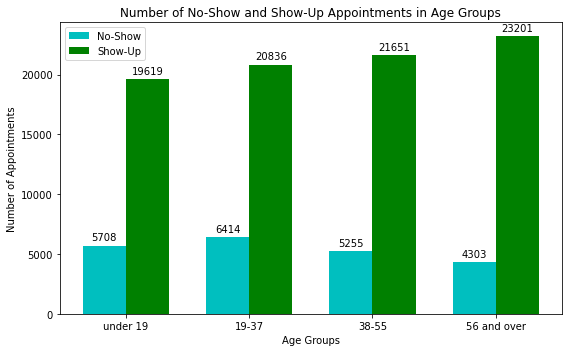

In [30]:
labels = ['under 19', '19-37', '38-55', '56 and over']
no_show = [5708, 6414, 5255, 4303]
show_up = [19619, 20836, 21651, 23201]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, no_show, width, label='No-Show', color= 'c')
rects2 = ax.bar(x + width/2, show_up, width, label='Show-Up', color= 'g')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Age Groups')
ax.set_ylabel('Number of Appointments')

ax.set_title('Number of No-Show and Show-Up Appointments in Age Groups')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

The results might be more clear if we will show the percentage of appoinments in each age group rather then raw numbers:


In [31]:
#remind percentage of noshow visits again 
#pct = df['Noshow'].value_counts()['Yes'] / df.shape[0]*100
#print(pct)
df['Noshow'].value_counts(normalize=True)['Yes']

0.20193438647919945

In [32]:
#count percentage of no-show visits for each age group
df_percentage_noshow = 100*df_age_noshow/df_age_appointments
print(df_percentage_noshow)
#print(df.percentage_noshow[0])
#print(df.percentage_noshow[1])

age_groups
under 19       22.537213
19-37          23.537615
38-55          19.530960
56 and over    15.644997
Name: Noshow, dtype: float64


In [33]:
#count percentage of show up visits for each age group
df_percentage_show = 100*df_age_show/df_age_appointments
print(df_percentage_show)

age_groups
under 19       77.462787
19-37          76.462385
38-55          80.469040
56 and over    84.355003
Name: Noshow, dtype: float64


Percantages visualisation:

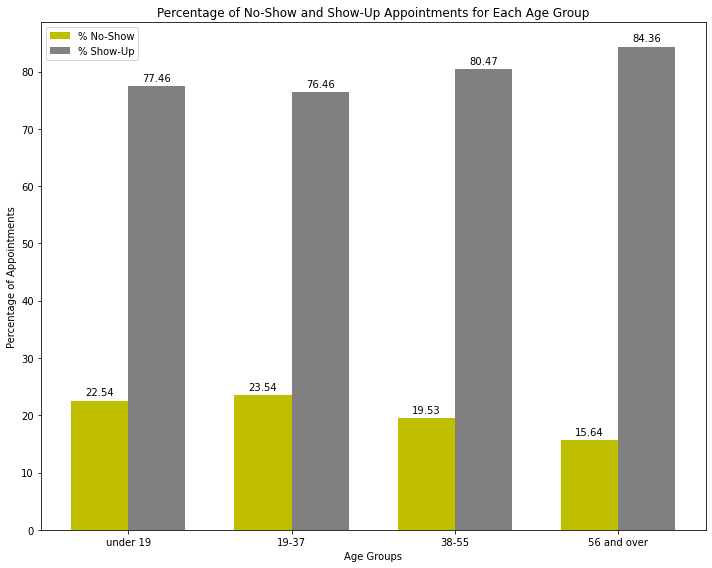

In [35]:
labels = ['under 19', '19-37', '38-55', '56 and over']
#percentage of no-show and show-up appoinments separately for each age group 
pct_no_show = [22.54, 23.54, 19.53, 15.64]
pct_show_up = [77.46, 76.46, 80.47, 84.36]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, pct_no_show, width, label='% No-Show', color= 'y')
rects2 = ax.bar(x + width/2, pct_show_up, width, label='% Show-Up', color= 'grey')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Age Groups')
ax.set_ylabel('Percentage of Appointments')

ax.set_title('Percentage of No-Show and Show-Up Appointments for Each Age Group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    
    for rect in rects:

        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


Results:
We counted that no-show visits make around 20% of total amount of appointments.   
We can see that:
-in the two groups of younger patients there is a higher percentage of no-show appointments. 
 with the highest no-show ratio in the age group 19-37.
-in age group 56 and over, the difference between no-show and show-up is the most significant.
 there is the lowest percentage of no-show appointments. 
-in the two older groups, there is a noticable decrease of no-show visits (in comparison to younger groups).   
 


QUESTION 2
Is there a link between message received / not received and not showing up for the appointment?

We want to know if sms receivement can increase attendance, especially in younger age groups.
First, we will check if receiving an sms message is connected with higher attendance (in total, in all age groups, in the lowest and highest result groups). 

In [34]:
#count number of patients who did and did not receive the sms before visit
total_SMS = df['SMS_received'].value_counts()
print(total_SMS)

0    75044
1    35482
Name: SMS_received, dtype: int64


In [35]:
#count percentage of patients who did and did not receive the sms before visit
#pct_SMS = df['SMS_received'].value_counts()/ df.shape[0]*100
#print(pct_SMS)
pct_SMS = df['SMS_received'].value_counts(normalize=True)
print(pct_SMS)

0    0.678971
1    0.321029
Name: SMS_received, dtype: float64


A significant number of patients (over 67% of patients) did not received an sms before their visit. 
For no-show appointments, we will check how many patients in each age group received an sms. 

In [36]:
#counts the amount of no-show appoinments in each patients' age group, along with information about sms message receivement
df_age_noshow_sms = df[df.Noshow=='Yes'].groupby(['age_groups', 'SMS_received']).count()['Noshow']
print(df_age_noshow_sms)

age_groups   SMS_received
under 19     0               3341
             1               2367
19-37        0               3290
             1               3124
38-55        0               2901
             1               2354
56 and over  0               2580
             1               1723
Name: Noshow, dtype: int64


In [37]:
#counts the amount of show-up appoinments in each patients' age group, along with information about sms message receivement
df_age_noshow_sms = df[df.Noshow=='No'].groupby(['age_groups', 'SMS_received']).count()['Noshow']
print(df_age_noshow_sms)

age_groups   SMS_received
under 19     0               14434
             1                5185
19-37        0               14642
             1                6194
38-55        0               15007
             1                6644
56 and over  0               16207
             1                6994
Name: Noshow, dtype: int64


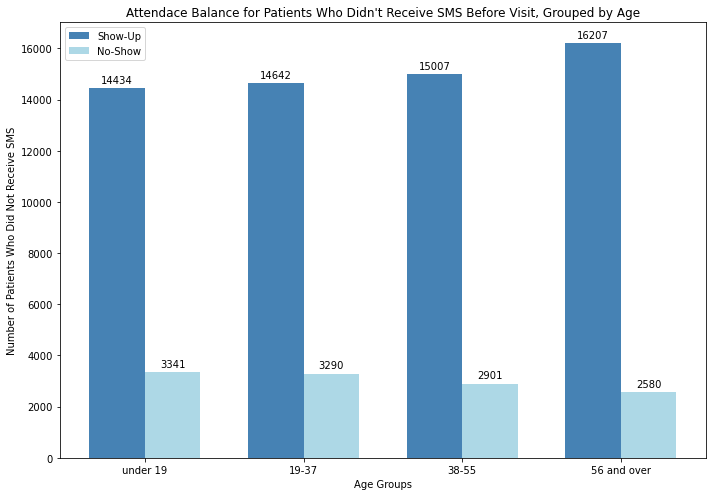

In [38]:
labels = ['under 19', '19-37', '38-55', '56 and over']
#number of patients in  each age group who didn't received sms along with info about appointment attendance

show_up_nosms = [14434, 14642, 15007, 16207]

no_show_nosms = [3341, 3290, 2901, 2580]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, show_up_nosms, width, label='Show-Up', color= 'steelblue')
rects2 = ax.bar(x + width/2, no_show_nosms, width, label='No-Show', color= 'lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Age Groups')
ax.set_ylabel('Number of Patients Who Did Not Receive SMS')

ax.set_title("Attendace Balance for Patients Who Didn't Receive SMS Before Visit, Grouped by Age")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    
    for rect in rects:

        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Patients who didn't receive an sms before vistit are still very likely to attend the visit. 


Lets check this by visualising  appointment attendance balance for patients who received the sms: 

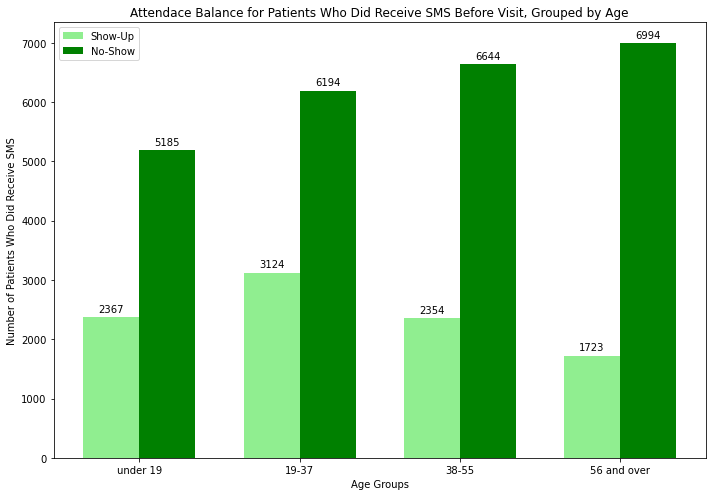

In [39]:
labels = ['under 19', '19-37', '38-55', '56 and over']
#number of patients in  each age group who did receive an sms along with info about appointment attendance

show_up_yessms = [2367, 3124, 2354, 1723]

no_show_yessms = [5185, 6194, 6644, 6994]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, show_up_yessms, width, label='Show-Up', color= 'lightgreen')
rects2 = ax.bar(x + width/2, no_show_yessms, width, label='No-Show', color= 'green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Age Groups')
ax.set_ylabel('Number of Patients Who Did Receive SMS')

ax.set_title("Attendace Balance for Patients Who Did Receive SMS Before Visit, Grouped by Age")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    
    for rect in rects:

        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In each age group sms receivement does not have a significant impact on attendance. Or in other words: it might have an impact bu it is not a decisive factor.

In the age group of 19-37 number of patients who received sms and show-up for an appointment is relatively higher. As we know from previous analysis, 19-37 group has the highest number of unattended visits. It looks like sms might be helping in this age group.

Let's try to analyze further to see the impact of the sms messages in different age groups.

Lets see this results from the different angle:

In [40]:
#show only count the amount of no-show appoinments in age groups, only for patients who didn't receive an sms message
df_age_noshow_nosms = df.query('Noshow=="Yes" & SMS_received==0').groupby(['age_groups']).count()['Noshow']
print(df_age_noshow_nosms)

age_groups
under 19       3341
19-37          3290
38-55          2901
56 and over    2580
Name: Noshow, dtype: int64


In [41]:
#count percentage of no-show visits for each age group when sms has not been received 
df_percentage_noshow_nosms = df_age_noshow_nosms/ df_age_noshow*100
print(df_percentage_noshow_nosms)

age_groups
under 19       58.531885
19-37          51.294044
38-55          55.204567
56 and over    59.958169
Name: Noshow, dtype: float64


In [42]:
#show only count the amount of no-show appoinments in age groups, only for patients who did receive an sms message
df_age_noshow_yessms = df.query('Noshow=="Yes" & SMS_received==1').groupby(['age_groups']).count()['Noshow']
print(df_age_noshow_yessms)

age_groups
under 19       2367
19-37          3124
38-55          2354
56 and over    1723
Name: Noshow, dtype: int64


In [43]:
#count percentage of no-show visits for each age group when sms has been received 
df_percentage_noshow_yessms = df_age_noshow_yessms/df_age_noshow*100
print(df_percentage_noshow_yessms)

age_groups
under 19       41.468115
19-37          48.705956
38-55          44.795433
56 and over    40.041831
Name: Noshow, dtype: float64


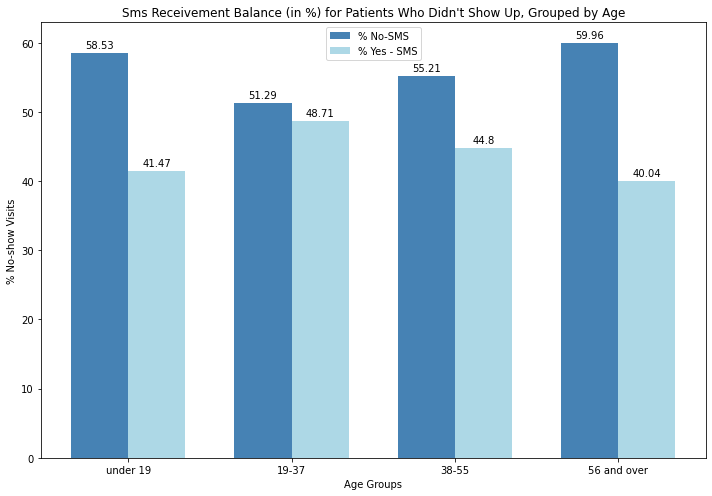

In [44]:
#age group labels
labels = ['under 19', '19-37', '38-55', '56 and over']

#percentage no-show appoinments separately for each age group along with an info about sms receivement
noshow_nosms = [58.53, 51.29, 55.21, 59.96]
noshow_yessms = [41.47, 48.71, 44.80, 40.04]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, noshow_nosms, width, label='% No-SMS', color= 'steelblue')
rects2 = ax.bar(x + width/2, noshow_yessms, width, label='% Yes - SMS', color= 'lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Age Groups')
ax.set_ylabel('% No-show Visits')

ax.set_title("Sms Receivement Balance (in %) for Patients Who Didn't Show Up, Grouped by Age")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    
    for rect in rects:

        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Combining the results for Question 2

We can see that there is potential correlation. Looking at all "no-show" cases, there is higher amount of patients who did not received sms. Such balance is visible in all age groups with wider difference in two groups (below 19 and over 56) 

It might be interesting field for further research if sending the sms twice could further improve the attendance?
Perhaps sending the sms twice only to youngest group?
(as this group has the highest number of unattended visits in total).


QUESTION 3
Is there a difference in appointments' attendace for different neighbourhoods. 
Which neighbourhood has the highest number of ‘no-show-ups’? 



In [45]:
#We want to know if there are big differences in number of visits between neighbourhoods.
#check names of neighbourhood areas in our data frame
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [46]:
#Count how many times each area appears in df
area = df['Neighbourhood'].value_counts()
print(area)

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64


In [47]:
#counts the amount of appoinments in each neighbourhood
area_visits = df.groupby(['Neighbourhood']).count()['AppointmentID']
print(area_visits)

Neighbourhood
AEROPORTO                 8
ANDORINHAS             2262
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
                       ... 
SÃO JOSÉ               1977
SÃO PEDRO              2448
TABUAZEIRO             3132
UNIVERSITÁRIO           152
VILA RUBIM              851
Name: AppointmentID, Length: 81, dtype: int64


In [48]:
#check the number of no-show appointments in each neighbourhood 
area_noshow = df.query('Noshow=="Yes"').groupby(['Neighbourhood']).count()['AppointmentID']
print(area_noshow)

Neighbourhood
AEROPORTO                1
ANDORINHAS             521
ANTÔNIO HONÓRIO         50
ARIOVALDO FAVALESSA     62
BARRO VERMELHO          91
                      ... 
SÃO JOSÉ               428
SÃO PEDRO              515
TABUAZEIRO             573
UNIVERSITÁRIO           32
VILA RUBIM             141
Name: AppointmentID, Length: 80, dtype: int64


In [49]:
#lets show the above result in percentages
pct_area_noshow = 100* area_noshow/area_visits

print(pct_area_noshow)

Neighbourhood
AEROPORTO              12.500000
ANDORINHAS             23.032714
ANTÔNIO HONÓRIO        18.450185
ARIOVALDO FAVALESSA    21.985816
BARRO VERMELHO         21.513002
                         ...    
SÃO JOSÉ               21.648963
SÃO PEDRO              21.037582
TABUAZEIRO             18.295019
UNIVERSITÁRIO          21.052632
VILA RUBIM             16.568743
Name: AppointmentID, Length: 81, dtype: float64


In [50]:
#confirm the avarage percentage of unattended appointments for all neighbourhoods
pct_area_noshow.mean()

20.79957228842361

In [51]:
#lets use median for more adequate result
pct_area_noshow.median()

19.765045263535207

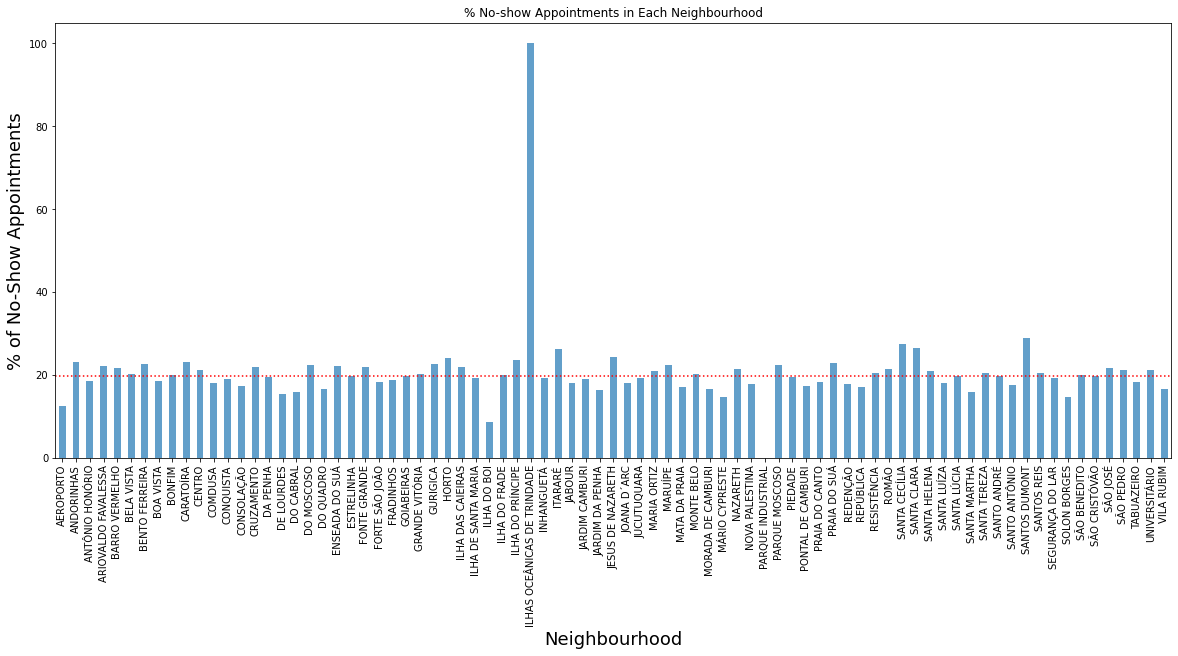

In [52]:
#visualise the above results
plt.rcParams['figure.figsize'] = (20, 8)
pct_area_noshow.plot(kind='bar', title='% No-show Appointments in Each Neighbourhood', alpha=.7);
plt.xlabel('Neighbourhood', fontsize=18)
plt.ylabel('% of No-Show Appointments', fontsize=18)
#draw median line
median = pct_area_noshow.median()
plt.axhline(median, color='red', ls='dotted')

Most of the results for area's no-show appoinments are in range 14-26. 
It is oscilating around median (19.8) or average (20.8) - and in Layman's terms we will aknowledge them as "average".

Next, let's concentrate on no-show visits which are significantly below or above "average".
Based on the chart - we can clearly see 4 areas show significanly different no

Let's start with listng the number of no-show visits in the chosen areas.

In [53]:
#check for type of pct_area_noshow
type(pct_area_noshow)

pandas.core.series.Series

In [54]:
#We will make a list of results with number of noshow visits siginificantly below or above average.
r_1 = area_noshow.get(key = 'AEROPORTO')
r_2 = area_noshow.get(key = 'ILHA DO BOI')
r_3 = area_noshow.get(key = 'ILHAS OCEÂNICAS DE TRINDADE')
r_4 = area_noshow.get(key = 'PARQUE INDUSTRIAL')

shortlist_area_noshow = [r_1, r_2, r_3, r_4]
print(shortlist_area_noshow)

[1, 3, 2, None]


First we will count the percentage of no-show visits in selected neighbourhoods. Then we will check the number of vistis in these neighbourhoods and compare them to have a better understanding for further analysis. 

In [55]:
 # We will make a list of results with percentage of noshow visits siginificantly below or above average.
result_1 = pct_area_noshow.get(key = 'AEROPORTO')
result_2 = pct_area_noshow.get(key = 'ILHA DO BOI')
result_3 = pct_area_noshow.get(key = 'ILHAS OCEÂNICAS DE TRINDADE')
result_4 = pct_area_noshow.get(key = 'PARQUE INDUSTRIAL')

shortlist_pct_area_noshow = [result_1, result_2, result_3, result_4]
print(shortlist_pct_area_noshow)



[12.5, 8.571428571428571, 100.0, nan]


In [56]:
#convert data to pd series
short_pct_area_noshow = pd.Series(shortlist_pct_area_noshow)
neighbourhood = ['AEROPORTO', 'ILHA DO BOI', 'ILHAS OCEÂNICAS DE TRINDADE', 'PARQUE INDUSTRIAL']
series_neighbourhood = pd.Series(neighbourhood)

#convert data to pd dataframes and change column names
df_short_pct_area_noshow = short_pct_area_noshow.to_frame()
df_short_pct_area_noshow = df_short_pct_area_noshow.rename(columns = {0:'Percent of Noshow Visits'})

df_neighbourhood = pd.DataFrame(series_neighbourhood)
df_neighbourhood = df_neighbourhood.rename(columns = {0:'Neighbourhood'})

#concat dataframes
df_short = pd.concat([df_neighbourhood, df_short_pct_area_noshow], axis=1)
print(df_short)
print(type(df_short))

                 Neighbourhood  Percent of Noshow Visits
0                    AEROPORTO                 12.500000
1                  ILHA DO BOI                  8.571429
2  ILHAS OCEÂNICAS DE TRINDADE                100.000000
3            PARQUE INDUSTRIAL                       NaN
<class 'pandas.core.frame.DataFrame'>


In [57]:
df_short.fillna(0)

,Neighbourhood,Percent of Noshow Visits
0,AEROPORTO,12.500000
1,ILHA DO BOI,8.571429
2,ILHAS OCEÂNICAS DE TRINDADE,100.000000
3,PARQUE INDUSTRIAL,0.000000


In [58]:
# the amount of appoinments in each neighbourhood
area_visits

Neighbourhood
AEROPORTO                 8
ANDORINHAS             2262
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
                       ... 
SÃO JOSÉ               1977
SÃO PEDRO              2448
TABUAZEIRO             3132
UNIVERSITÁRIO           152
VILA RUBIM              851
Name: AppointmentID, Length: 81, dtype: int64

In [59]:
# We will make a list with number of visits where noshow are siginificantly below or above average.
area_1 = area_visits.get(key = 'AEROPORTO')
area_2 = area_visits.get(key = 'ILHA DO BOI')
area_3 = area_visits.get(key = 'ILHAS OCEÂNICAS DE TRINDADE')
area_4 = area_visits.get(key = 'PARQUE INDUSTRIAL')

shortlist_area_visits = [area_1, area_2, area_3, area_4]
print(shortlist_area_visits)

[8, 35, 2, 1]


In [60]:
short_area_visits = pd.Series(shortlist_area_visits)
#convert data to pd dataframes and change column names
short_area_visits = short_area_visits.to_frame()
df_short_area_visits = short_area_visits.rename(columns = {0:'Number_of_Visits'})


#concat dataframes
df_short_area_visits = pd.concat([df_neighbourhood, df_short_area_visits], axis=1)

print(df_short_area_visits)


                 Neighbourhood  Number_of_Visits
0                    AEROPORTO                 8
1                  ILHA DO BOI                35
2  ILHAS OCEÂNICAS DE TRINDADE                 2
3            PARQUE INDUSTRIAL                 1


Text(0, 0.5, 'Number of Appointments')

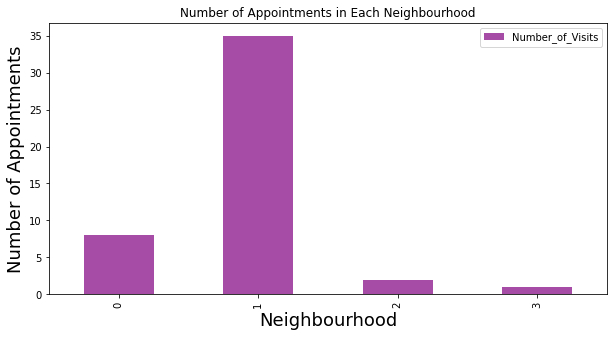

In [61]:
#plot total number of visits in chosen neighbourhoods
plt.rcParams['figure.figsize'] = (10, 5)
df_short_area_visits.plot(kind='bar', title='Number of Appointments in Each Neighbourhood', alpha=.7, color='purple')
plt.xlabel('Neighbourhood', fontsize=18)
plt.ylabel('Number of Appointments', fontsize=18)
#draw median line showing avarage number of appointments in total
#median = df['AppointmentID'].median()
#plt.axhline(median, color='red', ls='dotted')

In [62]:
#check the percentage that the above four neighbourhoods make of total number of visits
pct_short_area_visits = 100* df_short_area_visits['Number_of_Visits']/df['AppointmentID'].count()
print(pct_short_area_visits)

0    0.007238
1    0.031667
2    0.001810
3    0.000905
Name: Number_of_Visits, dtype: float64


In [63]:
#convert data to pd series
short_pct_area_noshow = pd.Series(shortlist_pct_area_noshow)
neighbourhood = ['AEROPORTO', 'ILHA DO BOI', 'ILHAS OCEÂNICAS DE TRINDADE', 'PARQUE INDUSTRIAL']
series_neighbourhood = pd.Series(neighbourhood)

#convert data to pd dataframes and change column names
df_short_pct_area_noshow = short_pct_area_noshow.to_frame()
df_short_pct_area_noshow = df_short_pct_area_noshow.rename(columns = {0:'%_of_Noshow_Visits'})

df_neighbourhood = pd.DataFrame(series_neighbourhood)
df_neighbourhood = df_neighbourhood.rename(columns = {0:'Neighbourhood'})

df_pct_short_area_visits = pct_short_area_visits.to_frame()
df_pct_short_area_visits = df_pct_short_area_visits.rename(columns = {'Number_of_Visits':'%Total_Visits'})
#concat dataframes
df_short = pd.concat([df_neighbourhood, df_short_pct_area_noshow, df_pct_short_area_visits], axis=1)
#df_short.fillna(0)
print(df_short.fillna(0))
#print(type(df_short))

                 Neighbourhood  %_of_Noshow_Visits  %Total_Visits
0                    AEROPORTO           12.500000       0.007238
1                  ILHA DO BOI            8.571429       0.031667
2  ILHAS OCEÂNICAS DE TRINDADE          100.000000       0.001810
3            PARQUE INDUSTRIAL            0.000000       0.000905


In [64]:
# the above result is not clear. Lets use the total number of visits for each area instead of percentage:
df_short_area_visits = df_short_area_visits.rename(columns = {'Number of Visits':'Total_Number_of_Visits'})
#concat dataframes
df_short_withnum = pd.concat([df_short_area_visits, df_short_pct_area_noshow], axis=1)

print(df_short_withnum.fillna(0))


                 Neighbourhood  Number_of_Visits  %_of_Noshow_Visits
0                    AEROPORTO                 8           12.500000
1                  ILHA DO BOI                35            8.571429
2  ILHAS OCEÂNICAS DE TRINDADE                 2          100.000000
3            PARQUE INDUSTRIAL                 1            0.000000


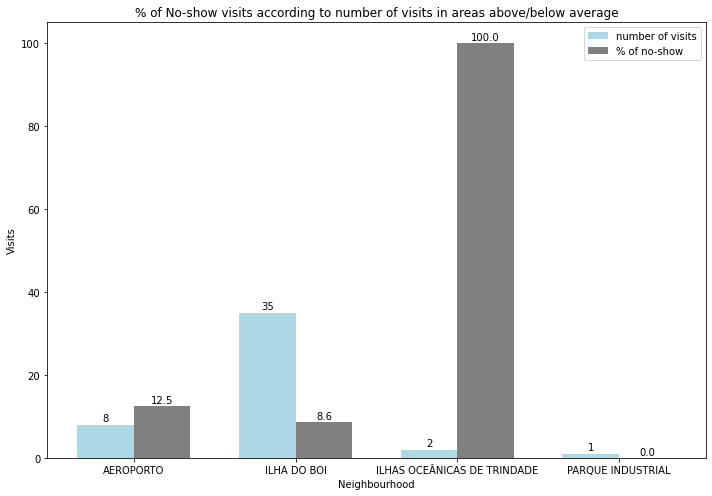

In [65]:
#plot with total number of visits (instead of percents) for the selected areas
labels = ['AEROPORTO', 'ILHA DO BOI', 'ILHAS OCEÂNICAS DE TRINDADE', 'PARQUE INDUSTRIAL']

aarea_number_of_visits = [8, 35, 2, 1]
aarea_percent_of_noshow = [12.5, 8.6, 100.0, 0.0]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, aarea_number_of_visits, width, label='number of visits', color= 'lightblue')
rects2 = ax.bar(x + width/2, aarea_percent_of_noshow, width, label='% of no-show', color= 'gray')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Visits')

ax.set_title("% of No-show visits according to number of visits in areas above/below average")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    
    for rect in rects:

        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

The number of visits in selected neighbourhoods is very low. For the further research - in this four areas, it might be reasonable to focus on improving the overall number of appointments made, instead of focusing on no-show visits only. 

It is also worth to check here, what results will give the analysis if we exclude these four extreme results. 


In [66]:
#convert df_pct_area_noshow into dataframe
df_pct_area_noshow=pct_area_noshow.to_frame()
df_pct_area_noshow

,AppointmentID
Neighbourhood,
AEROPORTO,12.500000
ANDORINHAS,23.032714
ANTÔNIO HONÓRIO,18.450185
ARIOVALDO FAVALESSA,21.985816
BARRO VERMELHO,21.513002
...,...
SÃO JOSÉ,21.648963
SÃO PEDRO,21.037582
TABUAZEIRO,18.295019


In [67]:
#reset index to make Neighbourhood column
df_pct_area_noshow.reset_index(inplace=True)
df_pct_area_noshow

,Neighbourhood,AppointmentID
0,AEROPORTO,12.500000
1,ANDORINHAS,23.032714
2,ANTÔNIO HONÓRIO,18.450185
3,ARIOVALDO FAVALESSA,21.985816
4,BARRO VERMELHO,21.513002
...,...,...
76,SÃO JOSÉ,21.648963
77,SÃO PEDRO,21.037582
78,TABUAZEIRO,18.295019
79,UNIVERSITÁRIO,21.052632


In [68]:
#make new df where 4 rows with extreme values are removed
df_pct_area_shorter = df_pct_area_noshow.drop(df_pct_area_noshow.index[df_pct_area_noshow['Neighbourhood'].isin(['AEROPORTO','ILHA DO BOI', 'ILHAS OCEÂNICAS DE TRINDADE','PARQUE INDUSTRIAL'])])
df_pct_area_shorter

,Neighbourhood,AppointmentID
1,ANDORINHAS,23.032714
2,ANTÔNIO HONÓRIO,18.450185
3,ARIOVALDO FAVALESSA,21.985816
4,BARRO VERMELHO,21.513002
5,BELA VISTA,20.136340
...,...,...
76,SÃO JOSÉ,21.648963
77,SÃO PEDRO,21.037582
78,TABUAZEIRO,18.295019
79,UNIVERSITÁRIO,21.052632


In [69]:
#df_all.dropna(inplace=True)
df_pct_area_shorter.reset_index(drop=True, inplace=True)
df_pct_area_shorter

,Neighbourhood,AppointmentID
0,ANDORINHAS,23.032714
1,ANTÔNIO HONÓRIO,18.450185
2,ARIOVALDO FAVALESSA,21.985816
3,BARRO VERMELHO,21.513002
4,BELA VISTA,20.136340
...,...,...
72,SÃO JOSÉ,21.648963
73,SÃO PEDRO,21.037582
74,TABUAZEIRO,18.295019
75,UNIVERSITÁRIO,21.052632


In [70]:
df_pct_area_shorter.isnull().sum()

Neighbourhood    0
AppointmentID    0
dtype: int64

In [71]:
df_pct_area_shorter['AppointmentID'].median()

19.77124183006536

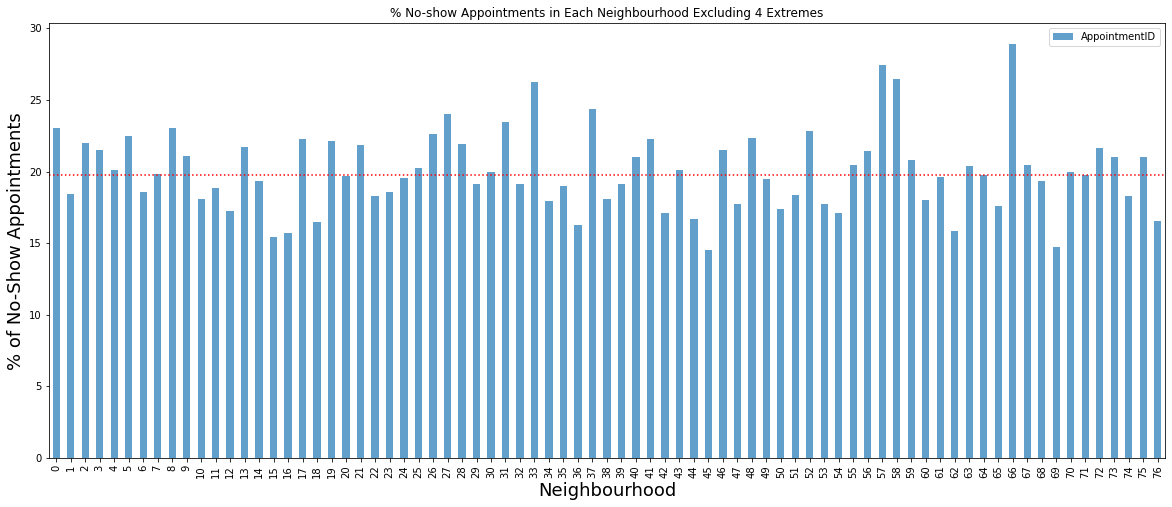

In [72]:
#visualise the above results
plt.rcParams['figure.figsize'] = (20, 8)
df_pct_area_shorter.plot(kind='bar', title='% No-show Appointments in Each Neighbourhood Excluding 4 Extremes', alpha=.7);
plt.xlabel('Neighbourhood', fontsize=18)
plt.ylabel('% of No-Show Appointments', fontsize=18)
#ticks = df_pct_area_shorter['Neighbourhood'].unique
#plt.xticks(df_pct_area_shorter['Neighbourhood'].unique())
#draw median line
mmedian = df_pct_area_shorter['AppointmentID'].median()
plt.axhline(mmedian, color='red', ls='dotted')

The above chart didn't show neighbourhoods' names. Lets try to add them:

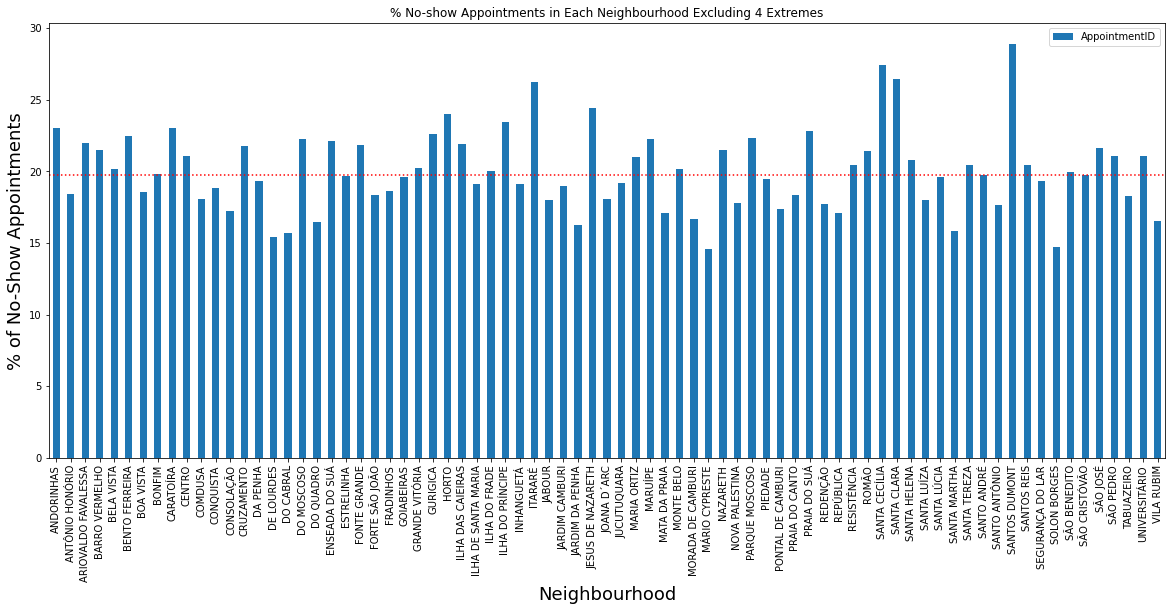

In [73]:
# plot chart with neighbourhood' names set as xticks
df_pct_area_shorter.set_index('Neighbourhood').plot.bar()
plt.title('% No-show Appointments in Each Neighbourhood Excluding 4 Extremes')
plt.xlabel('Neighbourhood', fontsize=18)
plt.ylabel('% of No-Show Appointments', fontsize=18)
mmedian = df_pct_area_shorter['AppointmentID'].median()
plt.axhline(mmedian, color='red', ls='dotted')

The above chart suggests that it might be reasonable to analyse the data further through neighbourhoods' context. There are significant differences between neighbourhoods' appointment attendance. considering that the data covers only ne month, we will leave it as a suggestion for further research over longer period.

QUESTION 4
Does day of the week of the appointment make a difference in appointments' frequency?

We will check how number of appointments fluctuates along the data. First, we need to confirm that our dataframe contains only data for May 2016, as suggested by the csv file title.

In [74]:
# as we checked at the very beginning of this analysis, our AppointmentDay column type is an object 
# we want to convert the AppointmentDay column to datetime format
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])
#check if AppointmentDay Dtype is successfuly converted into datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  object             
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  Noshow        

Now, lets confirm for which period of time exactly we have the data

In [75]:
min(df['AppointmentDay'])

Timestamp('2016-04-29 00:00:00+0000', tz='UTC')

In [76]:
max(df['AppointmentDay'])

Timestamp('2016-06-08 00:00:00+0000', tz='UTC')

We have data for 29/04/2016 - 08/06/2016, what is a little bit more than a month May - but still, analysing appointments' frequency  based on such short period of time would not be reasonable. 
However, we can try to check which day of the week has the lowest visits' number in this period of time.
We will check if there is a difference and, on this base, answer the question how the timetable might be adjust to serve the needs better.

In [78]:
#we will create a column with the name of the day of the week of the appointment for convenience
df['Day_of_the_Week'] = df['AppointmentDay'].dt.day_name() 
# Check for the Day_of_the_Week column
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,age_groups,Day_of_the_Week
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,56 and over,Friday
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,56 and over,Friday
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,56 and over,Friday
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,under 19,Friday
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,56 and over,Friday


In [79]:
#check for number of appointment for each day of the week
df_date_a = df.groupby(df.Day_of_the_Week).AppointmentID.count().to_frame()
print(df_date_a)

                 AppointmentID
Day_of_the_Week               
Friday                   19019
Monday                   22714
Saturday                    39
Thursday                 17247
Tuesday                  25640
Wednesday                25867


In [80]:
#correct the order of days of the week 
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
df_date_b = df.groupby(df.Day_of_the_Week).AppointmentID.count().reindex(days).to_frame()
print(df_date_b)

                 AppointmentID
Day_of_the_Week               
Monday                 22714.0
Tuesday                25640.0
Wednesday              25867.0
Thursday               17247.0
Friday                 19019.0
Saturday                  39.0
Sunday                     NaN


In [81]:
#rename AppointmentID column's name
df_date= df_date_b.rename(columns = {'AppointmentID':'Number of Visits'})

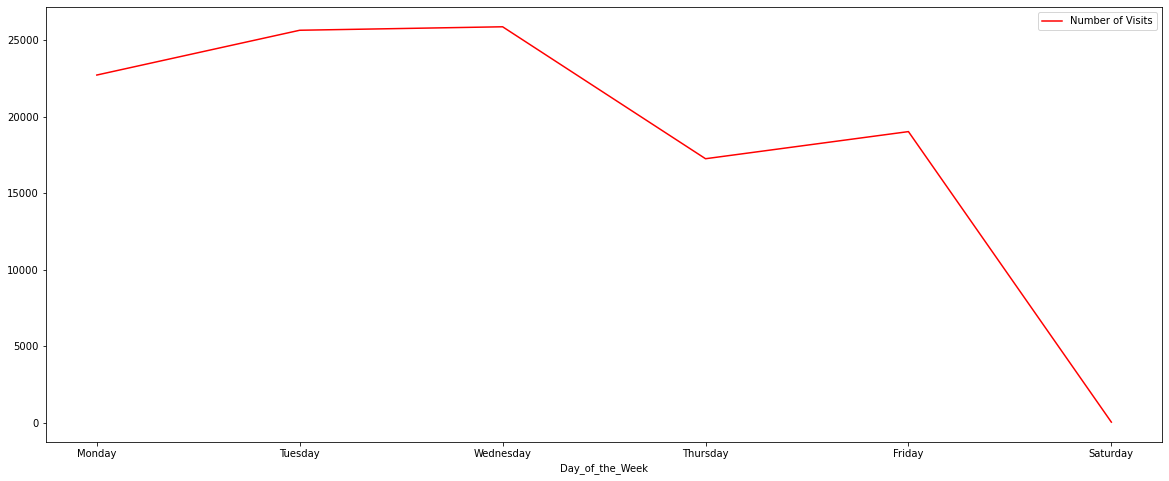

In [82]:
#simple line chart will be perfect for visualition here
ax = df_date.plot.line(color='red')

We can clearly see the visits' cumulation in the first three days of the week, then significant decrease on Thursday & Friday and rapid fall on Saturday.
We have no confirmation in our data, so we can only presume that the working hours on Saturday are shorter 
what might explain the rapid fall on Saturday. 

QUESTION 5
Does permanent illness or handicap influence the amount of not attended appointments?

In [83]:
#check number of visits for patients with hipertension
hipertension_visits = df.groupby(['Hipertension']).count()['AppointmentID']
print(hipertension_visits)

Hipertension
0    88725
1    21801
Name: AppointmentID, dtype: int64


In [84]:
#check for number appointments made by patientts with hipertension only
df['Hipertension'].value_counts()[1]

21801

In [85]:
#check the percentage which this number makes of total appointments in hipertension column
df['Hipertension'].value_counts(normalize=True)[1]

0.19724770642201836

In [86]:
#show only the number of no-show appointment for patients with hipertenstion
hipertension_noshow = df.query('Noshow=="Yes" & Hipertension ==1').groupby(['Hipertension']).count()['Noshow']
print(hipertension_noshow)

Hipertension
1    3772
Name: Noshow, dtype: int64


In [87]:
pct_hipertension_noshow = 100*hipertension_noshow/df['Hipertension'].count()
print(pct_hipertension_noshow)

Hipertension
1    3.412772
Name: Noshow, dtype: float64


Do the same for Diabetes column

In [88]:
df['Diabetes'].count()

110526

In [89]:
#check number of visits for patients without and with diabetes
diabetes_visits = df.groupby(['Diabetes']).count()['Noshow']
print(diabetes_visits)

Diabetes
0    102583
1      7943
Name: Noshow, dtype: int64


In [90]:
#check the percentage that diabetes patients make of total number of appointments
df['Diabetes'].value_counts(normalize=True)[1]

0.07186544342507645

In [91]:
#check only the number of no-show appointments for patients with diabetes
diabetes_noshow = df.query('Noshow=="Yes" & Diabetes ==1').groupby(['Diabetes']).count()['Noshow']
print(diabetes_noshow)

Diabetes
1    1430
Name: Noshow, dtype: int64


In [92]:
#percentage that no-show show visits make in group of diabetes patients
pct_diabetes_noshow = 100*diabetes_noshow/df['Noshow'].count()
print(pct_diabetes_noshow)

Diabetes
1    1.293813
Name: Noshow, dtype: float64


Do the same for Alcoholism column

In [93]:
#check number of visits for patients without and with alcoholism
alcoholism_visits = df.groupby(['Alcoholism']).count()['Noshow']
print(alcoholism_visits)

Alcoholism
0    107166
1      3360
Name: Noshow, dtype: int64


In [94]:
#check the percentage that alcoholism patients make of total number of appointments
df['Alcoholism'].value_counts(normalize=True)[1]

0.030400086857391023

In [95]:
#check only the number of no-show appointments for patients with alcoholism
alcoholism_noshow = df.query('Noshow=="Yes" & Alcoholism ==1').groupby(['Alcoholism']).count()['Noshow']
print(alcoholism_noshow)

Alcoholism
1    677
Name: Noshow, dtype: int64


In [96]:
#percentage that no-show show visits make in group of alcoholism patients
pct_alcoholism_noshow = 100*alcoholism_noshow/df['Noshow'].count()
print(pct_alcoholism_noshow)

Alcoholism
1    0.612526
Name: Noshow, dtype: float64


Do the same for handicap column. 
Then put together percentages of no show visits for each group. 

In [97]:
#check number of visits for patients without and with handicap
handcap_visits = df.groupby(['Handcap']).count()['Noshow']
print(handcap_visits)

Handcap
0    108285
1      2042
2       183
3        13
4         3
Name: Noshow, dtype: int64


We got an unexpected result: instead of 0 and 1 we have 0-4. Lets check unique values in Handcap column

In [98]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

The description for the data set is not provided so we can only presume that in Handcap column the values confirm both: wheter or not a patient has a handicap as well as the number of patient's handicaps.

In [99]:
#check the total number of appointments for handicap patients's
all_handcap_visits = df.query('Handcap in [1, 2, 3, 4]').count()['Noshow']
print(all_handcap_visits)

2241


In [100]:
#check the percentage that handcap patients make of total number of appointments
pct_all_handcap = 100*all_handcap_visits/df['Noshow'].count()
print(pct_all_handcap)

2.0275772216492047


In [101]:
#check only the number of no-show appointments for patients with any handicaps 

#handcap_noshow = df.query('(Noshow=="Yes") and (Handcap in [1, 2, 3, 4])').groupby(['Handcap']).count()['Noshow']
handcap_noshow = df.query('(Noshow=="Yes") and (Handcap in [1, 2, 3, 4])').count()['Noshow']
print(handcap_noshow)

407


In [102]:
#percentage that no-show show visits make in group of handicap patients
pct_handcap_noshow = 100*handcap_noshow/df['Noshow'].count()
print(pct_handcap_noshow)

0.3682391473499448


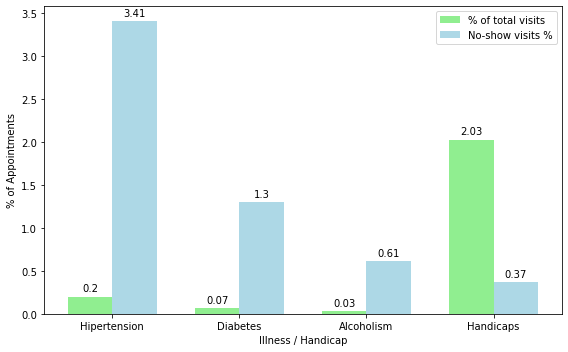

In [103]:
labels = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handicaps']
pct_of_total_visits = [0.20, 0.07, 0.03, 2.03]
pct_of_noshow_visits = [3.41, 1.3, 0.61, 0.37]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects3 = ax.bar(x - width/2, pct_of_total_visits, width, label='% of total visits', color= 'lightgreen')
rects4 = ax.bar(x + width/2, pct_of_noshow_visits, width, label='No-show visits %', color= 'lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Illness / Handicap')
ax.set_ylabel('% of Appointments')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
#draw median line
#df['Noshow']
#median = df[Noshow.median()
#plt.axhline(median, color='red', ls='dotted')

plt.show()

Number of appointments for patients with hipertension, diabetes, alcoholism and handicaps is small 
(these visits make between 0.03-2.03 % of total number of appointments). 
In all groups the percentage of noshow visits is also very small - between 0.37 - 3.41%.
In a group with the biggest number of visits (handicaps) the percentage of no show visits is the smallest.
While in a group with hipertension (second in regards of number of visits) the percentage of no-show visits is the biggest.

CONCLUSIONS

The amount of unattended appointments in May, 2016, makes around 20% of total number of appointments. 
Assuming that attendance over 90% is considered as good, the above result suggest that some improvements might be needed. 

1.Is appointment attendance dependent on patients' age? 

  The appointment attendace is slightly dependent on patients' age.
  The analysis show that patients in groups 38-55, 56-115 are more likely to attend the appoinment.
  Therefore, when planning attendance improvement, it would be reasonable to focus rather on groups of younger patients (till 
  18, 19-37). 
  
   
2.Is there a link between message received / not received and not showing up for the appointment?
  If yes, in which age group this dependency is the strongest
  
  In general, more than half of the patients (over 67% of patients) did not received an sms before their visit. 
  The results of analysis show that in each age group sms receivement increases appointment attendace.
  Especially, in the groups till_18 and 56-115.
  To increase the attendance, we would suggest improvement of sms sending system. First, increase the amount of patients who 
  would receive sms. Second, allow sending sms twice to the youngest group, as this group has the highest number of 
  unattended visits in total.

3.Is there a difference in appointments' attendace for different neighbourhoods. 
  Which neighbourhood has the highest number of ‘no-show-ups’? 
  
  The prevailing amonunt of neighbourhoods has the avarage percentage of unattended appointments on the same level - around 
  20%.
  There are only four neigbourhoods with siginificantly lower attendance, so we focus on them.
  We found out that the overall number of visits in selected neighbourhoods is very low. Therefore, in these four areas , it 
  might be reasonable to focus first on improving the overall number of appointments made, instead of focusing on no-show 
  visits only.  

  For the future reference, the analysis might be continued in this direction with focus on neighbourhoods with number of
  no-show visits closer to median - but only if we would have data for longer period of time.
  
4.Does time (month, day of the week) of the appointment make a difference for appointments' frequency?

  We have data for a very short period of time (29/04/2016 - 08/06/2016) so we don't analyse overall appointments'  frequency.
  Focusing on frequency for days of the week instead, we observe visits' cumulation in the first three days of the week, then
  significant decrease on Thursday & Friday and rapid fall on Saturday.
  We have no confirmation in our data, so we can only presume that the working hours on Saturday are shorter 
  what might explain the rapid fall on Saturday. 

  The suggested improvements here might be:
  -expand the working hours on Monday, Tuesday & Wednesday by, for example, expanding staff numbers and adding extra shifts to
  the timeschedule.
  -if hiring new staff is an issue - maybe shorten working hours on Friday, Tuesday and move saved shifts to Mo, Tu & Th?
  -check working hours on Saturday - maybe something could be changed (working hours misght be prolong or shortened even more, 
   depends on existing timetable).


5.Does illness or disability influence the amount of not attended appointments?
  
  Number of appointments for patients with hipertension, diabetes, alcoholism and handicaps is small 
  (these visits make between 0.03-2.03 % of total number of appointments). 
  In all these groups the percentage of noshow visits is also very small - between 0.37 - 3.41%.
  In a group with the biggest number of visits (handicaps) the percentage of no show visits is the smallest,
  while in a group with hipertension (second in regards of number of visits) the percentage of no-show visits is the biggest.
  
  We suggest that hipertension, alcoholism, diabetes and handicaps should not be the main factors to be taken into the 
  considaration while preparing the attendance improvement plan.
  
  Possible suggestion here - maybe it is worth to check the statistics for a longer period of time for people with longterm 
  illnesses and handicaps to: 
  First, answer the question how many patients with illnesses/handicaps are registered in the system and how many & with what
  frequency those patients make appointments. 
  Second: it would be then more possible to presume which group of these patients is more likely to attend the appointment.
  
  
  If the data for longer period of time and some more detailed information would be provided in the dataset, more precise
  and detailed analysis would be possible. 
  
  Credits:
  https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html, https://numpy.org/devdocs/user/index.html,
  https://docs.python.org/3/contents.html, https://matplotlib.org/3.5.1/tutorials/index.html, https://seaborn.pydata.org/, 
  https://stackoverflow.com/
  
  
  